# Лаба 5_1

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [4]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Логистическая регрессия

In [11]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_log = model.predict(X_test)
y_proba_log = model.predict_proba(X_test)[:, 1]

In [54]:
print(f'Precision (Доля верно предсказанных больных среди всех, кого модель назвала больными): {precision_score(y_test, y_pred_log):.4f}')
print(f'Recall (Доль верно найденных больных среди всех реально больных): {recall_score(y_test, y_pred_log):.4f}')
print(f'f1-score: {f1_score(y_test, y_pred_log):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_log):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_log):.4f}")

Precision (Доля верно предсказанных больных среди всех, кого модель назвала больными): 0.6379
Recall (Доль верно найденных больных среди всех реально больных): 0.6727
f1-score: 0.6549
ROC-AUC: 0.8129
PR-AUC: 0.7143


#### Решающие деревья

In [15]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
y_proba_tree = tree.predict_proba(X_test)[:, 1]

In [46]:
print(f'Precision (Доля верно предсказанных больных среди всех, кого модель назвала больными): {precision_score(y_test, y_pred_tree):.4f}')
print(f'Recall (Доль верно найденных больных среди всех реально больных): {recall_score(y_test, y_pred_tree):.4f}')
print(f'f1-score: {f1_score(y_test, y_pred_tree):.4f}')
print(f"ROC-AUC: {roc_auc_score(y_test, y_proba_tree):.4f}")
print(f"PR-AUC: {average_precision_score(y_test, y_proba_tree):.4f}")

Precision (Доля верно предсказанных больных среди всех, кого модель назвала больными): 0.6250
Recall (Доль верно найденных больных среди всех реально больных): 0.7273
f1-score: 0.6723
ROC-AUC: 0.7424
PR-AUC: 0.5519


In [56]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

Классы не сбалансированы

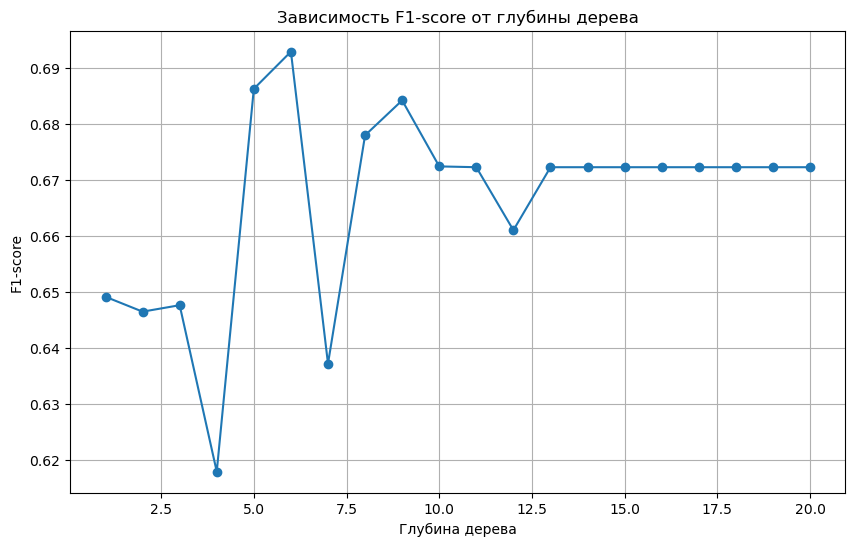

In [63]:
depths = range(1, 21)
f1_scores = []

for depth in depths:
    tree_temp = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree_temp.fit(X_train, y_train)
    y_pred_temp = tree_temp.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred_temp))

plt.figure(figsize=(10, 6))
plt.plot(depths, f1_scores, marker='o')
plt.xlabel('Глубина дерева')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от глубины дерева')
plt.grid()
plt.show()

In [73]:
optimal_depth = depths[np.argmax(f1_scores)]
print(f"Оптимальная глубина: {optimal_depth}")

Оптимальная глубина: 6


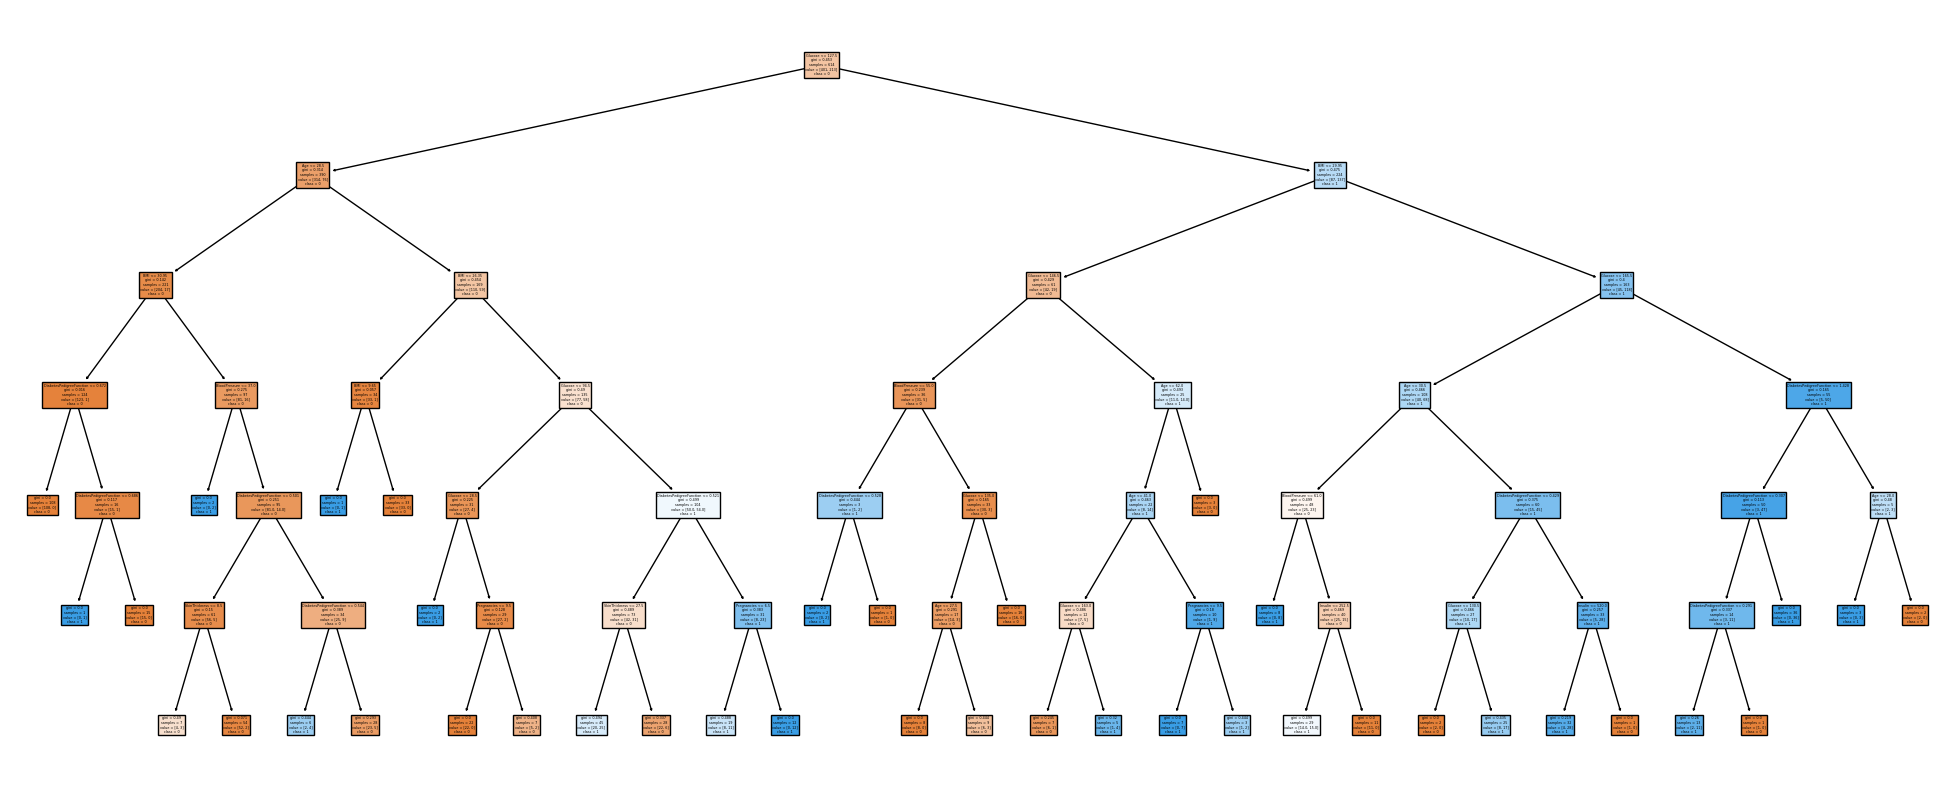

In [128]:
optimal_tree = DecisionTreeClassifier(max_depth=optimal_depth, random_state=42)
optimal_tree.fit(X_train, y_train)

plt.figure(figsize=(25, 10))
plot_tree(optimal_tree, feature_names=X.columns, class_names=['0', '1'], filled=True)
plt.savefig('tree.png', dpi=300)
plt.show()


In [91]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

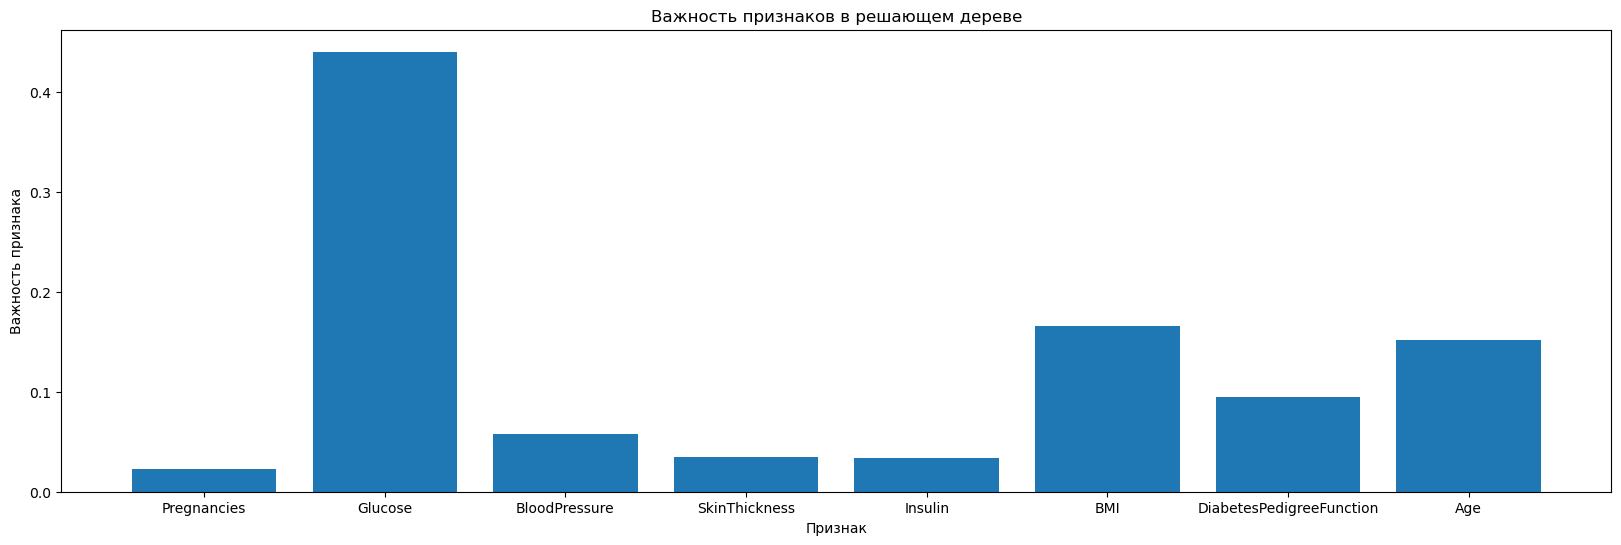

In [112]:
importances = optimal_tree.feature_importances_
plt.figure(figsize=(20, 6))
plt.bar(X.columns, importances)
plt.ylabel('Важность признака')
plt.xlabel('Признак')
plt.title('Важность признаков в решающем дереве')
plt.show()


In [116]:
from sklearn.metrics import precision_recall_curve, roc_curve

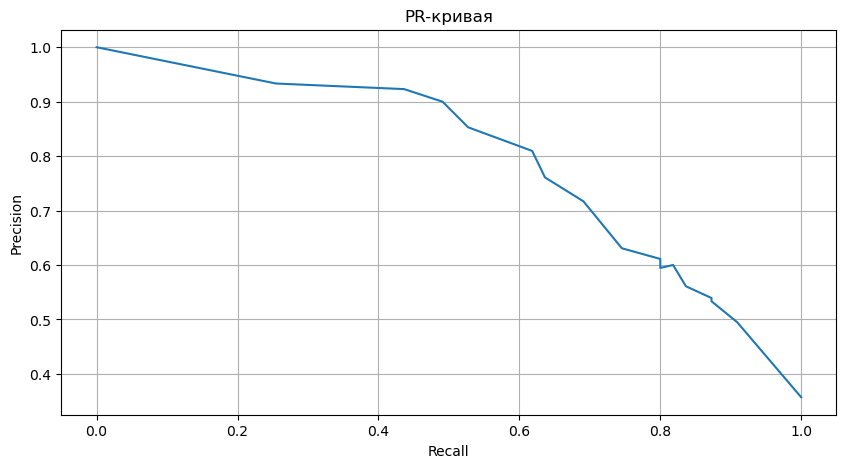

In [118]:
precision, recall, _ = precision_recall_curve(y_test, optimal_tree.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 5))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR-кривая')
plt.grid()
plt.show()

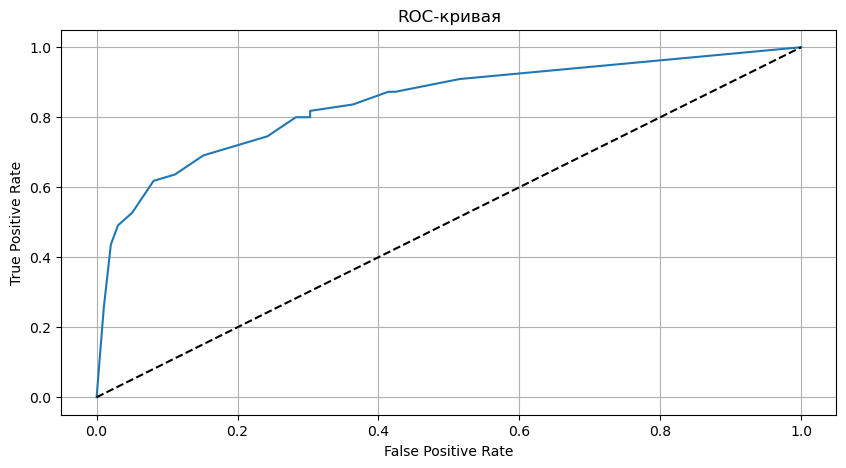

In [120]:
fpr, tpr, _ = roc_curve(y_test, optimal_tree.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.grid()
plt.show()

In [122]:
max_features = range(1, len(X.columns) + 1)
f1_scores_feat = []

for feat in max_features:
    tree_temp = DecisionTreeClassifier(max_depth=optimal_depth, max_features=feat, random_state=42)
    tree_temp.fit(X_train, y_train)
    y_pred_temp = tree_temp.predict(X_test)
    f1_scores_feat.append(f1_score(y_test, y_pred_temp))

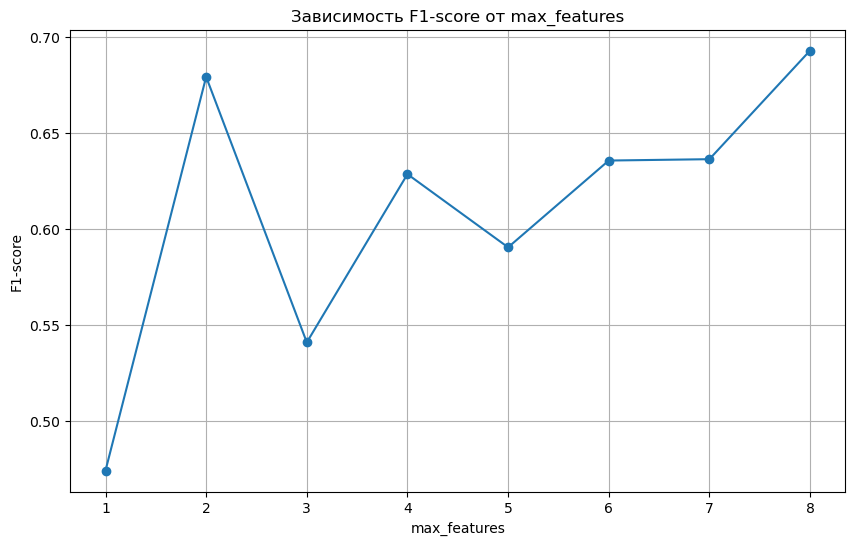

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(max_features, f1_scores_feat, marker='o')
plt.xlabel('max_features')
plt.ylabel('F1-score')
plt.title('Зависимость F1-score от max_features')
plt.grid()
plt.show()